In [1]:
import scipy.io as sio
data_mat = sio.loadmat('/home/yzy/SIMS/data_mat.mat')

In [2]:
data_mat=data_mat['data_mat']

In [3]:
from sklearn.preprocessing import RobustScaler


(37867, 277)

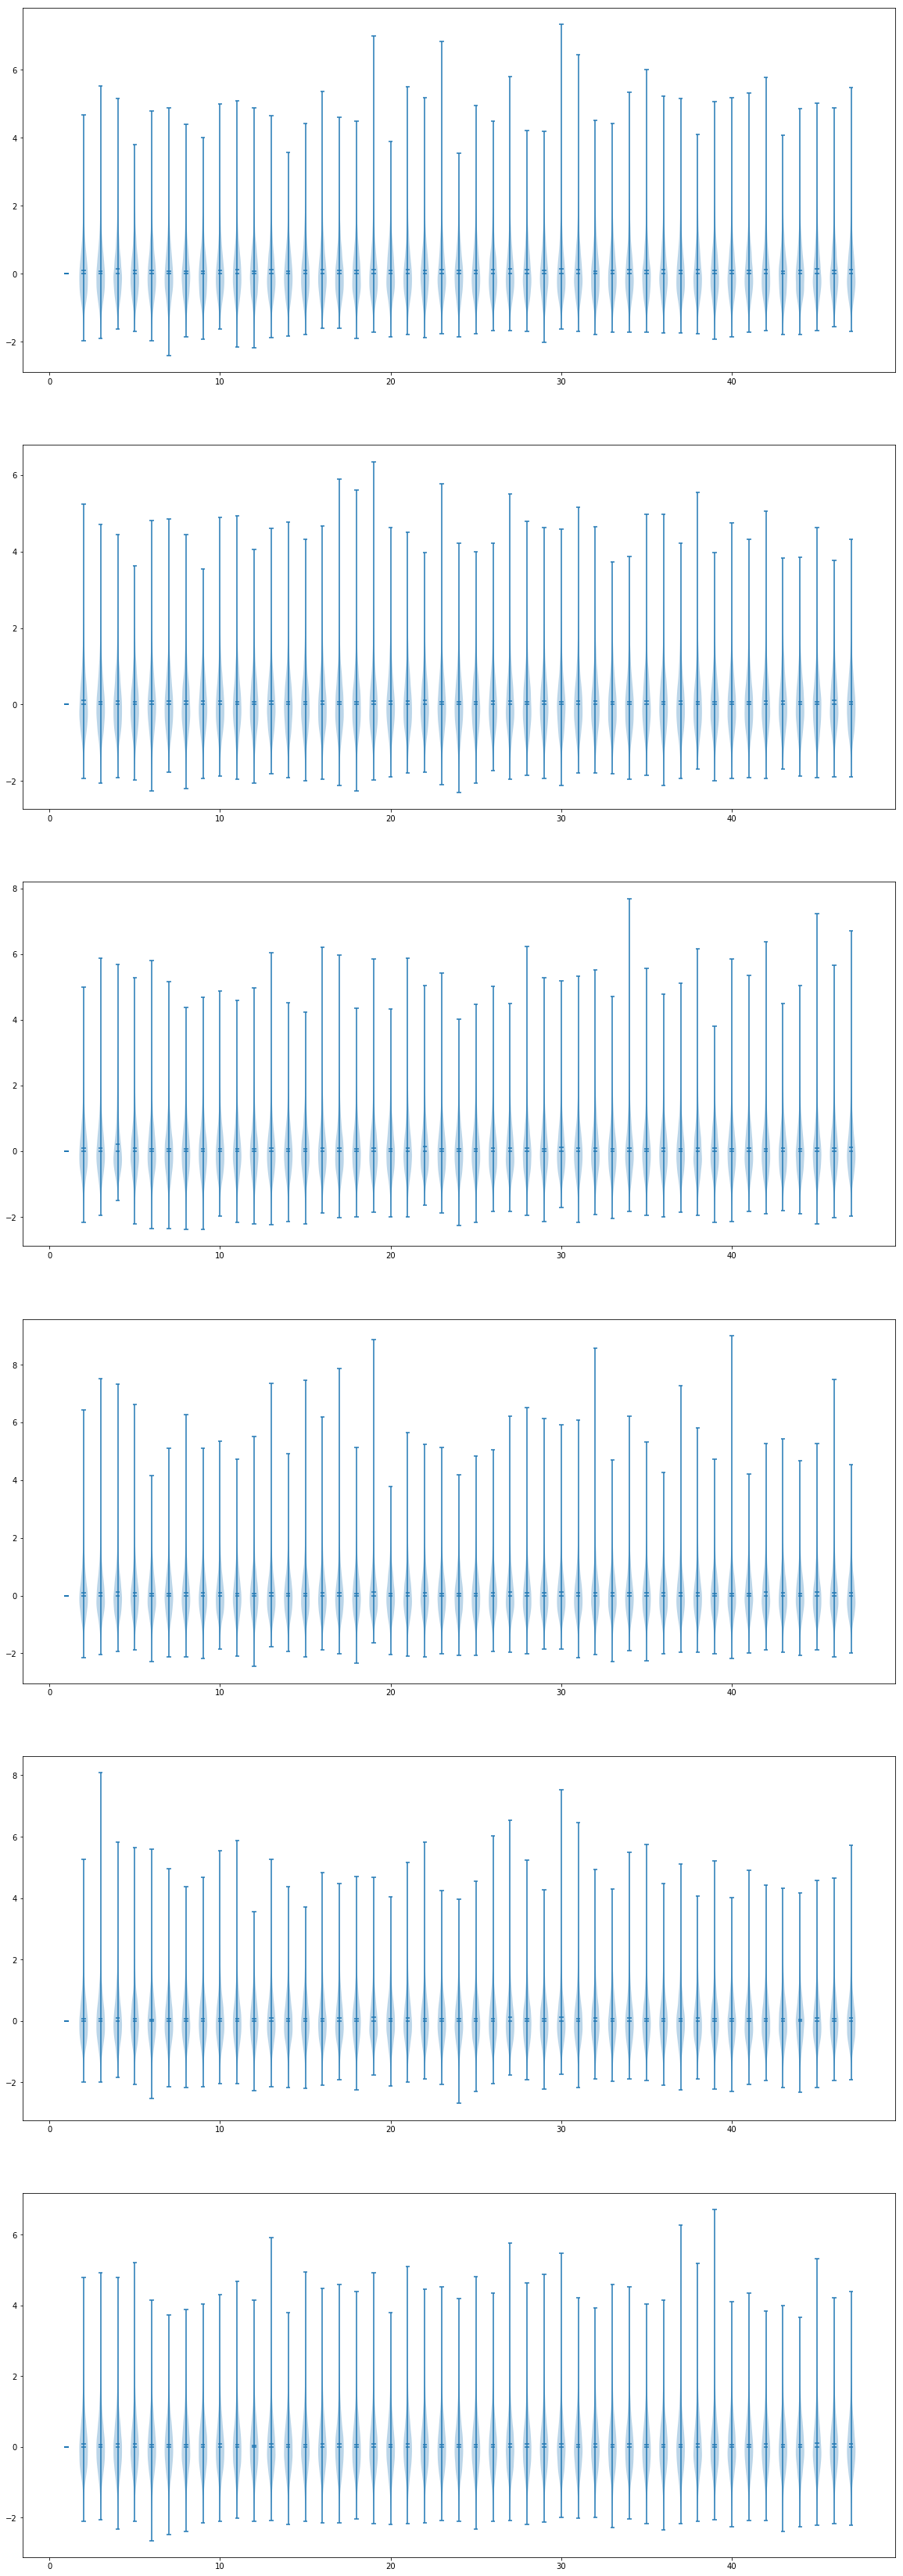

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler,MinMaxScaler


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(20, 60))
axes
for i in range(6):
    cur_data = data_mat[data_mat[:,0]==i+1,3:50]
    cur_data = cur_data/cur_data[:,0][:,None]
#     cur_data = MinMaxScaler().fit_transform(cur_data)
    cur_data = RobustScaler(with_scaling=True).fit_transform(cur_data)
    axes[i].violinplot(cur_data,showextrema=True,showmeans=True,showmedians=True)
plt.show()

In [ ]:
def median_spectrum_norm(data_mat):
    

In [46]:
import numpy as np
from sklearn.manifold import TSNE
import scipy.io as sio
from sklearn.preprocessing import RobustScaler,MinMaxScaler


data_mat = sio.loadmat('/home/yzy/SIMS/data_mat.mat')
data_mat=data_mat['data_mat']

print(data_mat.shape)

per_list = range(25,55,5)
whole_batch_robust = np.array([])
whole_batch_minmax = np.array([])
whole_batch_median = np.array([])
for i in range(6):
    i = i+1
#     print(cur_batch.shape)
    cur_batch = data_mat[data_mat[:,0]==i,3:]
    cur_batch_n = cur_batch/cur_batch[:,0][:,None]
    cur_batch_robust = RobustScaler().fit_transform(cur_batch_n)
    cur_batch_minmax = MinMaxScaler().fit_transform(cur_batch_n)
    cur_batch_median = (cur_batch_n+1)/(np.median(cur_batch_n,0)+1)
    whole_batch_robust = np.vstack([whole_batch_robust,cur_batch_robust]) if whole_batch_robust.size else cur_batch_robust
    whole_batch_minmax = np.vstack([whole_batch_minmax,cur_batch_minmax]) if whole_batch_minmax.size else cur_batch_minmax
    whole_batch_median = np.vstack([whole_batch_median,cur_batch_median]) if whole_batch_median.size else cur_batch_median
#     print(cur_batch.shape)
    for per in per_list:
        print('processing {batch_num} {per}..........'.format(batch_num=i,per=per))
#         cur_y = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(cur_batch)
#         cur_y_n = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(cur_batch_n)
        cur_y_robust = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(cur_batch_robust)
        cur_y_minmax = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(cur_batch_minmax)
        cur_y_median = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(cur_batch_median)
        
        np.save('/home/yzy/SIMS/embed_normrobust_batch{batch_num}_perplexity{per}.npy'.format(batch_num=i,per=per),cur_y_robust)
        np.save('/home/yzy/SIMS/embed_normminmax_batch{batch_num}_perplexity{per}.npy'.format(batch_num=i,per=per),cur_y_minmax)
        np.save('/home/yzy/SIMS/embed_normmedian_batch{batch_num}_perplexity{per}.npy'.format(batch_num=i,per=per),cur_y_median)
        
whole_batch = data_mat[:,3:]
whole_batch_n = whole_batch/whole_batch[:,0][:,None]


for per in per_list:
        print('processing whole batch {per}..........'.format(per=per))
        cur_y = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(whole_batch)
        cur_y_n = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(whole_batch_n)
        cur_y_robust = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(whole_batch_robust)
        cur_y_minmax = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(whole_batch_minmax)
        cur_y_median = TSNE(n_components=2,verbose=1,init='pca',perplexity=per).fit_transform(whole_batch_median)
        
        np.save('/home/yzy/SIMS/embed_norm1_batchwhole_perplexity{per}.npy'.format(per=per),cur_y_n)
        np.save('/home/yzy/SIMS/embed_norm0_batchwhole_perplexity{per}.npy'.format(per=per),cur_y)
        np.save('/home/yzy/SIMS/embed_normrobust_batchwhole_perplexity{per}.npy'.format(per=per),cur_robust)

        np.save('/home/yzy/SIMS/embed_normminmax_batchwhole_perplexity{per}.npy'.format(per=per),cur_minmax)

        np.save('/home/yzy/SIMS/embed_normmedian_batchwhole_perplexity{per}.npy'.format(per=per),cur_median)




        

(37867, 277)
processing 1 25..........
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4032
[t-SNE] Computed conditional probabilities for sample 2000 / 4032
[t-SNE] Computed conditional probabilities for sample 3000 / 4032
[t-SNE] Computed conditional probabilities for sample 4000 / 4032
[t-SNE] Computed conditional probabilities for sample 4032 / 4032
[t-SNE] Mean sigma: 2.097639
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.007498
[t-SNE] Error after 225 iterations: 1.007498
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4032
[t-SNE] Computed conditional probabilities for sample 2000 / 4032
[t-SNE] Computed conditional probabilities for sample 3000 / 4032
[t-SNE] Computed conditional probabilities for sample 4000 / 4032
[t-SNE] Computed conditional probabilities for sampl

KeyboardInterrupt: 

In [7]:
batch1 = data_mat[data_mat[:,0]==1,3:]

In [1]:
1+1

2

In [13]:
import numpy as np
batch1_n = batch1/batch1[:,0][:,None]

In [18]:
from sklearn.manifold import TSNE
y1 = TSNE(n_components=2,verbose=1).fit_transform(batch1_n)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 4032
[t-SNE] Computed conditional probabilities for sample 2000 / 4032
[t-SNE] Computed conditional probabilities for sample 3000 / 4032
[t-SNE] Computed conditional probabilities for sample 4000 / 4032
[t-SNE] Computed conditional probabilities for sample 4032 / 4032
[t-SNE] Mean sigma: 0.219925
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.355271
[t-SNE] Error after 325 iterations: 1.355271


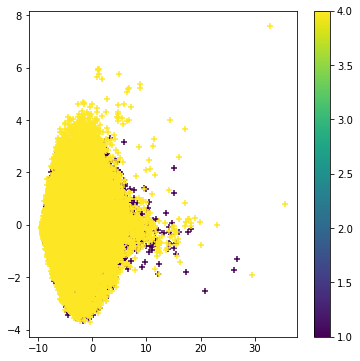

In [83]:
import numpy as np
batch_num = 'whole'
# batch_num='2'

feature_dim = 100
per = 40
ifnorm='0'
# ifnorm = 'minmax'
ifnorm = 'robust'
# ifnorm = 'median'
embed = np.load('/home/yzy/SIMS/embed_norm{ifnorm}_batch{batch_num}_perplexity{per}_featuredim{feature_dim}.npy'.format(feature_dim=feature_dim,ifnorm=ifnorm,batch_num=batch_num,per=per))
# embed = np.load('/home/yzy/SIMS/embed_norm{ifnorm}_batch{batch_num}_perplexity{per}.npy'.format(feature_dim=feature_dim,ifnorm=ifnorm,batch_num=batch_num,per=per))


scatter_num=embed.shape[0]
# label_2
# label = data_mat[data_mat[:,0]==2,2]
# label_3
# label = data_mat[data_mat[:,0]==3,2]
# label_5
# label = data_mat[data_mat[:,0]==5,2]
#label_whole_batchnum
label = data_mat[:,0]
#label_whole_celltype
# label = data_mat[:,2]
# label = np.random.randint(2,size=embed.shape[0])
import matplotlib.pyplot as plt
idx = np.random.randint(embed.shape[0],size=scatter_num)
idx = (data_mat[:,0]==1)
idx2 = (data_mat[:,0]==4)
idx=idx+idx2
plt.figure(figsize=(6,6))
plt.scatter(embed[idx,0],embed[idx,1],c=label[idx],marker='+')
plt.colorbar()
plt.show()

In [68]:
import numpy as np
a = np.array([[1,2,3],[2,4,6]])
b = np.array([])
b=np.vstack([a,b]) if b.size else a
b

array([[1, 2, 3],
       [2, 4, 6]])

In [71]:
c=(b==1) 
d=(b==2)

In [74]:
c+d

array([[ True,  True, False],
       [ True, False, False]], dtype=bool)

In [43]:
b/b[0,:]

array([[ 1.,  1.,  1.],
       [ 2.,  2.,  2.]])

In [45]:
b+1

array([[2, 3, 4],
       [3, 5, 7]])

In [1]:
1+1

2

In [26]:
data_mat[data_mat[:,0]==6,:].shape

(8720, 277)

In [28]:
data_mat.shape[1]

277